<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Загрузка-и-анализ-данных" data-toc-modified-id="Загрузка-и-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и анализ данных</a></span></li><li><span><a href="#Подготовка-данных-для-моделей" data-toc-modified-id="Подготовка-данных-для-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных для моделей</a></span></li><li><span><a href="#Создание-и-обучение-моделей" data-toc-modified-id="Создание-и-обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Создание и обучение моделей</a></span><ul class="toc-item"><li><span><a href="#KNN-Classifier" data-toc-modified-id="KNN-Classifier-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>KNN Classifier</a></span></li><li><span><a href="#Logistic-Regression-Classifier" data-toc-modified-id="Logistic-Regression-Classifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Logistic Regression Classifier</a></span></li><li><span><a href="#CatBoost-Classifier" data-toc-modified-id="CatBoost-Classifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>CatBoost Classifier</a></span></li><li><span><a href="#LGBM-Classifier" data-toc-modified-id="LGBM-Classifier-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>LGBM Classifier</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Дополнительная-проверка-модели" data-toc-modified-id="Дополнительная-проверка-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Дополнительная проверка модели</a></span></li><li><span><a href="#Тестирование-лучшей-модели-CatBoost-Classifier" data-toc-modified-id="Тестирование-лучшей-модели-CatBoost-Classifier-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование лучшей модели <strong>CatBoost Classifier</strong></a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Токсичные комментарии для интернет-магазина «Викишоп»

Интернет-магазин **«Викишоп»** запускает новый сервис. <br>
Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. <br>
То есть клиенты предлагают свои правки и комментируют изменения других. <br>
Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию.<br>

Создадим модель и обучим ее классифицировать комментарии на позитивные и негативные. <br>
Модель должна быть со значением метрики качества **F1** не меньше **0.75**.

Шаги выполнения проекта:
1. Загрузим и подготовим данные.
2. Обучим разные модели.
3. Выберем лучшую и сделаем выводы.

Описание данных:
- `text` - текст комментария
- `toxic`- целевой признак

____________________________________


In [1]:
#!pip install nltk

In [2]:
import re
import string
import itertools
import unicodedata

import time
import math
import warnings
import numpy as np
import pandas as pd

import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

import matplotlib
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy.stats import rv_discrete 
from datetime import datetime as _dt
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

matplotlib.style.use('ggplot')

pd.set_option('display.max_rows', None)
pd.set_option("display.max_colwidth", 500)
pd.options.mode.chained_assignment = None
warnings.filterwarnings(action="ignore", message="Mean of empty slice")
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
def get_info_on_dataset(_df):
    
    CONST_IN_PERCENTAGES = float(100.0)
    
    try:
        _df.info()
        df_review_info = pd.DataFrame({'Not_Valid_Values_in %': (_df.isna().sum()/len(_df))*CONST_IN_PERCENTAGES} )
        print("")
        display(df_review_info.sort_values(by='Not_Valid_Values_in %', ascending=False))
            
        print("")
        print("Number of duplicated rows in the dataset: {}".format(_df.duplicated().sum()))
            
    except:
        print("Can't provide review on given dataset")
    
    pass

In [4]:
def adjust_total_stop_words_list(_stop_words_list):
        
    total_stop_words_sample = ' '.join(_stop_words_list)
    total_stop_words_sample_processed = unicodedata.normalize('NFKD',
                                                              total_stop_words_sample).encode('ascii','ignore').decode()
    total_stop_words_sample_processed = punctuation_and_case(total_stop_words_sample_processed)
    total_stop_words_list_processed = total_stop_words_sample_processed.split(" ")

    return total_stop_words_list_processed

def punctuation_and_case(text_sample):

    string_punctuation = string.punctuation.replace('-','') + "’"
    punctuation_map = str.maketrans(string_punctuation, ' '*len(string_punctuation))
    
    return text_sample.translate(punctuation_map)

In [5]:
ML_RND_GNR_SEED_VALUE_CONST = int(424)
ML_CROSS_VALIDATION_FOLDS_NUMBER_CONST = 2

ML_TRAIN_REST_SPLIT_SIZE_VALUE_CONST = float(0.4)
ML_VALIDATION_TRAIN_SPLIT_SIZE_VALUE_CONST = float(0.5)

_CLOSE_TO_ZERO_VALUE_CONST = float(10E-1)

STOP_WORDS_LANGUAGES_LIST_CONST = ['english', 'german', 'french', 'italian'] 

total_stop_words_lists = [stopwords.words(_lng) for _lng in STOP_WORDS_LANGUAGES_LIST_CONST]
total_stop_words_list = list(itertools.chain(*total_stop_words_lists))

TOTAL_STOP_WORDS_LIST_PROCESSED_CONST = adjust_total_stop_words_list(total_stop_words_list)

TF_IDF_MIN_DF_VALUE_CONST = int(3)
TF_IDF_MAX_DF_VALUE_CONST = float(0.5)

In [6]:
def lowering(text_sample):

    processed_words_list = [w.lower() for w in text_sample.split()]

    return ' '.join(processed_words_list)


def stop_words(text_sample, _stop_words_ = TOTAL_STOP_WORDS_LIST_PROCESSED_CONST):
            
    text_sample_processed = [word for word in text_sample.split() if word not in _stop_words_]
    
    return ' '.join(text_sample_processed)

def strip_hashtags(text_sample):

    processed_words_list = []
    for word in text_sample.split(' '):
        word = word.strip()
        if word:
            if word.find('@') < 0 and word.find('#') < 0 :
                processed_words_list.append(word)
    return ' '.join(processed_words_list)

def alphanumeric_adjustment(text_sample):

    def if_word_valid(w):
        if w.isalnum() and not w.isalpha() and not w.isdigit():
            return False
        else:
            return True

    processed_words_list = [word for word in text_sample.split() if if_word_valid(word)]
    
    return ' '.join(processed_words_list)


def nltk_tag_to_wordnet_tag(nltk_tag):
    
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemm_sample(text_sample):
    
    wnl = nltk.stem.WordNetLemmatizer()
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(text_sample))
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    text_sample_processed = []
    
    for word, tag in wordnet_tagged:
        if tag is None:
            text_sample_processed.append(word)
        else:
            text_sample_processed.append(wnl.lemmatize(word, tag))
            
    return ' '.join(text_sample_processed)


def text_sample_lem_processing(text_sample, _stop_words_remove=False):
    
    text_sample_processed = unicodedata.normalize('NFKD', text_sample).encode('ascii','ignore').decode()
    text_sample_processed = strip_hashtags(text_sample_processed)
    text_sample_processed = punctuation_and_case(text_sample_processed)
    text_sample_processed = lowering(text_sample_processed)
    
    if _stop_words_remove:
        text_sample_processed = stop_words(text_sample_processed)
        
    text_sample_processed = lemm_sample(text_sample_processed)
    text_sample_processed = alphanumeric_adjustment(text_sample_processed)
        
    return text_sample_processed

## Загрузка и анализ данных

Загрузим датасет и изучим данные.

In [7]:
try:
    df_text_samples = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv')
except:
    df_text_samples = pd.read_csv('toxic_comments.csv')

In [8]:
df_text_samples.head(10)

,text,toxic
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess t...",0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0
5,"""\n\nCongratulations from me as well, use the tools well. · talk """,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,"Your vandalism to the Matt Shirvington article has been reverted. Please don't do it again, or you will be banned.",0
8,"Sorry if the word 'nonsense' was offensive to you. Anyway, I'm not intending to write anything in the article(wow they would jump on me for vandalism), I'm merely requesting that it be more encyclopedic so one can use it for school as a reference. I have been to the selective breeding page but it's almost a stub. It points to 'animal breeding' which is a short messy article that gives you no info. There must be someone around with expertise in eugenics? 93.161.107.169",0
9,alignment on this subject and which are contrary to those of DuLithgow,0


In [9]:
get_info_on_dataset(df_text_samples)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB



,Not_Valid_Values_in %
text,0.0
toxic,0.0



Number of duplicated rows in the dataset: 0


Дубликатов нет, 2 столбца `text` и `toxic`, 159570 строк.

In [10]:
df_text_samples_columns_title_updated_dict = {
    # before     #after
    'text'    : 'text_sample', 
    'toxic'   : 'is_toxic',
}

df_text_samples_columns_order_updated = ['text_sample', 'is_toxic']     

In [11]:
df_text_samples.rename(columns=df_text_samples_columns_title_updated_dict, inplace=True)
df_text_samples = df_text_samples[df_text_samples_columns_order_updated]

In [12]:
df_text_samples.head(10)

,text_sample,is_toxic
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess t...",0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0
5,"""\n\nCongratulations from me as well, use the tools well. · talk """,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,"Your vandalism to the Matt Shirvington article has been reverted. Please don't do it again, or you will be banned.",0
8,"Sorry if the word 'nonsense' was offensive to you. Anyway, I'm not intending to write anything in the article(wow they would jump on me for vandalism), I'm merely requesting that it be more encyclopedic so one can use it for school as a reference. I have been to the selective breeding page but it's almost a stub. It points to 'animal breeding' which is a short messy article that gives you no info. There must be someone around with expertise in eugenics? 93.161.107.169",0
9,alignment on this subject and which are contrary to those of DuLithgow,0


In [13]:
df_text_samples['is_toxic'].value_counts()

0    143346
1     16225
Name: is_toxic, dtype: int64

In [14]:
df_text_samples['is_toxic'].value_counts(normalize=True)

0    0.898321
1    0.101679
Name: is_toxic, dtype: float64

<br>
Видим, что присутствует дисбаланс классов - 10 % токсичных комментариев, 90 % нейтральных.<br>
Преобразуем текст: уберём пунктуацию, приводём к нижнему регистру, уберём стоп-слова, сделаем лемматизацию. 

In [15]:
df_text_samples['text_sample_processed'] = \
df_text_samples['text_sample'].map(lambda _sample: text_sample_lem_processing(_sample, _stop_words_remove=True))

In [16]:
df_text_samples[['text_sample','text_sample_processed']].head(5)

,text_sample,text_sample_processed
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",explanation edits make username hardcore metallica fan revert vandalisms closure gas vote new york doll fac please remove template talk page since retire 89 205 38 27
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",aww match background colour seemingly stuck thanks talk 21 51 january 11 2016 utc
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",hey really try edit guy constantly remove relevant information talk edits instead talk page seem care format actual info
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess t...",make real suggestion improvement - wondered section statistic later subsection type accident -i think reference may need tidy exact format ie date format etc later no-one else first - preference format style reference want please let know appear backlog article review guess may delay reviewer turn list relevant form eg
4,"You, sir, are my hero. Any chance you remember what page that's on?",sir hero chance remember page


<br>
Посмотрим на длину получившихся строк.

In [17]:
df_text_samples['text_sample_lenght'] = df_text_samples['text_sample_processed'].map(lambda x: len(x)) 

In [18]:
print(len(df_text_samples[df_text_samples['text_sample_lenght'] <= 0]))

39


In [19]:
df_text_samples[df_text_samples['text_sample_lenght'] <= 0].head(50)

,text_sample,is_toxic,text_sample_processed,text_sample_lenght
2407,"Here, here and here.",0,,0
12414,You're just at it again!,0,,0
23095,Where was it before?,0,,0
24397,Where do you come from?,0,,0
25604,Shouldn't this be NO3 not No3?,0,,0
26401,than just on/off such as on/off/,0,,0
31072,!!!!!\nWhat is all of this.,0,,0
32019,"""\nNo, they DON'T! """,0,,0
38313,what \n\nwhy did you do that!!,0,,0
39072,"""\nWhat about her? — (talk2me) """,0,,0


После преобразования текста у нас получилось 39 пустых строк. <br>
Как мы видим выше, данные строки не несут важной информации - удалим их.

In [20]:
df_text_samples = df_text_samples.drop(df_text_samples[df_text_samples['text_sample_lenght'] <= 0].index)

Можно приступать к подготовке данных для моделей машинного обучения.

## Подготовка данных для моделей

Разделим датасет на обучающую, валидационную и тестовую выборки.<br>
Чтобы сбалансировать классы для обучения моделей уменьшим объекты большего класса в обучающей выборке. <br>

In [22]:
ml_columns = ['text_sample_processed', 'is_toxic']

In [23]:
df_training, _df = train_test_split(df_text_samples[ml_columns], 
                                    test_size=ML_TRAIN_REST_SPLIT_SIZE_VALUE_CONST, 
                                    random_state=ML_RND_GNR_SEED_VALUE_CONST, 
                                    stratify=df_text_samples['is_toxic'].to_numpy())

df_validation, df_testing = train_test_split(_df, 
                                             test_size=ML_VALIDATION_TRAIN_SPLIT_SIZE_VALUE_CONST, 
                                             random_state=ML_RND_GNR_SEED_VALUE_CONST, 
                                             stratify=_df['is_toxic'].to_numpy())

In [24]:
print('Полный датасет целевой признак:')
display(df_text_samples['is_toxic'].value_counts())
print('Обучающий датасет целевой признак:')
display(df_training['is_toxic'].value_counts())
print('Валидационный датасет целевой признак:')
display(df_validation['is_toxic'].value_counts())
print('Тестовый датасет целевой признак:')
display(df_testing['is_toxic'].value_counts())

Полный датасет целевой признак:


0    143308
1     16224
Name: is_toxic, dtype: int64

Обучающий датасет целевой признак:


0    85985
1     9734
Name: is_toxic, dtype: int64

Валидационный датасет целевой признак:


0    28661
1     3245
Name: is_toxic, dtype: int64

Тестовый датасет целевой признак:


0    28662
1     3245
Name: is_toxic, dtype: int64

In [25]:
_NEGATIVE_SAMPLES_NUMBER_CONST = df_training.is_toxic[df_training['is_toxic'] == 1].count()
_POSITIVE_SAMPLES_NUMBER_CONST = int(_NEGATIVE_SAMPLES_NUMBER_CONST/0.3)

df_training_positive = df_training.loc[(df_training['is_toxic'] == 0), :].sample(_POSITIVE_SAMPLES_NUMBER_CONST, random_state=ML_RND_GNR_SEED_VALUE_CONST)
df_training_negative = df_training.loc[(df_training['is_toxic'] == 1), :].sample(_NEGATIVE_SAMPLES_NUMBER_CONST, random_state=ML_RND_GNR_SEED_VALUE_CONST)
df_training_reduced = shuffle(pd.concat([df_training_positive, df_training_negative])).reset_index(drop=True)

                                               
print('Размерность обучающего датасета, количество различных элементов в классах до процедуры undersampling:')
print(df_training['text_sample_processed'].shape)
print(df_training['is_toxic'].value_counts())
print('')
print('Размерность обучающего датасета, количество различных элементов в классах после процедуры undersampling:')
print(df_training_reduced['text_sample_processed'].shape)
print(df_training_reduced['is_toxic'].value_counts())

Размерность обучающего датасета, количество различных элементов в классах до процедуры undersampling:
(95719,)
0    85985
1     9734
Name: is_toxic, dtype: int64

Размерность обучающего датасета, количество различных элементов в классах после процедуры undersampling:
(42180,)
0    32446
1     9734
Name: is_toxic, dtype: int64


<br>
Определим важность слов для наших комментариев <b>TF-IDF</b> - преобразуем текст в векторное представление

In [26]:
tf_idf_vectorizer = TfidfVectorizer(min_df=TF_IDF_MIN_DF_VALUE_CONST, 
                                    max_df=TF_IDF_MAX_DF_VALUE_CONST)

In [27]:
X_tf_idf_training = tf_idf_vectorizer.fit_transform(df_training_reduced['text_sample_processed'])
X_tf_idf_validation = tf_idf_vectorizer.transform(df_validation['text_sample_processed'])
X_tf_idf_testing = tf_idf_vectorizer.transform(df_testing['text_sample_processed'])

In [28]:
Y_training = df_training_reduced['is_toxic']
Y_validation = df_validation['is_toxic']
Y_testing = df_testing['is_toxic']

In [29]:
print('Обучающая выборка обучающие признаки:')
print('Размерность: {}'.format(X_tf_idf_training.shape))
print('Валидационная выборка обучающие признаки:')
print('Размерность: {}'.format(X_tf_idf_validation.shape))
print('Тестовая выборка обучающие признаки:')
print('Размерность: {}'.format(X_tf_idf_testing.shape))

print('Обучающая выборка целевой признак:')
print('Размерность: {}'.format(Y_training.shape))
print('Валидационная выборка целевой признак:')
print('Размерность: {}'.format(Y_validation.shape))
print('Тестовая выборка целевой признак:')
print('Размерность: {}'.format(Y_testing.shape))

print('Обучающая выборка обучающие признаки:')
display(X_tf_idf_training[:1])
print('Валидационная выборка обучающие признаки:')
display(X_tf_idf_validation[:1])
print('Тестовая выборка обучающие признаки:')
display(X_tf_idf_testing[:1])

Обучающая выборка обучающие признаки:
Размерность: (42180, 19474)
Валидационная выборка обучающие признаки:
Размерность: (31906, 19474)
Тестовая выборка обучающие признаки:
Размерность: (31907, 19474)
Обучающая выборка целевой признак:
Размерность: (42180,)
Валидационная выборка целевой признак:
Размерность: (31906,)
Тестовая выборка целевой признак:
Размерность: (31907,)
Обучающая выборка обучающие признаки:


<1x19474 sparse matrix of type '<class 'numpy.float64'>'
	with 52 stored elements in Compressed Sparse Row format>

Валидационная выборка обучающие признаки:


<1x19474 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

Тестовая выборка обучающие признаки:


<1x19474 sparse matrix of type '<class 'numpy.float64'>'
	with 34 stored elements in Compressed Sparse Row format>

In [32]:
print('Обучающая выборка обучающий признак:')
print('Размерность: {}'.format(X_tf_idf_training.shape))
print('Валидационная выборка обучающий признак:')
print('Размерность: {}'.format(X_tf_idf_validation.shape))
print('Тестовая выборка обучающий признак:')
print('Размерность: {}'.format(X_tf_idf_testing.shape))

print('Обучающая выборка обучающий признак:')
display(X_tf_idf_training[:1])
print('Валидационная выборка обучающий признак:')
display(X_tf_idf_validation[:1])
print('Тестовая выборка обучающий признак:')
display(X_tf_idf_testing[:1])

Обучающая выборка обучающий признак:
Размерность: (42180, 19474)
Валидационная выборка обучающий признак:
Размерность: (31906, 19474)
Тестовая выборка обучающий признак:
Размерность: (31907, 19474)
Обучающая выборка обучающий признак:


<1x19474 sparse matrix of type '<class 'numpy.float64'>'
	with 52 stored elements in Compressed Sparse Row format>

Валидационная выборка обучающий признак:


<1x19474 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

Тестовая выборка обучающий признак:


<1x19474 sparse matrix of type '<class 'numpy.float64'>'
	with 34 stored elements in Compressed Sparse Row format>

Данные готовы, приступим к созданию и обучению моделей.

## Создание и обучение моделей

Создадим функции для получения информации о метриках моделей и таблицу с результатами.

In [35]:
def get_info_results(best_model, X, Y):
    
    _actual_pred = best_model.predict(X)
    _actual_accuracy_value = accuracy_score(Y, _actual_pred)
    _actual_f1_value = f1_score(Y, _actual_pred)
    _actual_predict_proba = best_model.predict_proba(X)
    _actual_predict_proba_values = _actual_predict_proba[:, 1]
    _actual_auc_roc_value = roc_auc_score(Y, _actual_predict_proba_values)
    
    print('accuracy: ', round(_actual_accuracy_value,2))
    print('f1_score: ', round(_actual_f1_value,2))
    print('auc_roc:  ', round(_actual_auc_roc_value,2))
    print('')
    print(classification_report(Y, _actual_pred))       
    pass



def get_gs_results(_time, best_score, best_params):
    
    print('Время подбора                 {} сек.'.format(round(_time, 0) ))
    print('Лучший результат:            ', round(gs_result.best_score_, 2))
    print('Лучшая модель с параметрами: ', gs_result.best_params_)
    
    pass


    
results = pd.DataFrame()
results['model_name'] = ['KNN_Classifier','Logistic_Regression','CatBoost_Classifier','LGBM_Classifier']
results['grid_search_time'] = pd.Series([])
results['best_score_F1'] = pd.Series([])
results['accuracy'] = pd.Series([])
results['F1_score'] = pd.Series([])
results['auc_roc'] = pd.Series([])

Приступим к обучению моделей.

### KNN Classifier

- **обучение**

In [36]:
knn_hyperparameters_search_space = dict()
knn_hyperparameters_search_space['n_jobs'] = [-1]
knn_hyperparameters_search_space['n_neighbors'] = [5, 10, 15]
knn_hyperparameters_search_space['algorithm'] = ['auto']
knn_hyperparameters_search_space['leaf_size'] = [30]
knn_hyperparameters_search_space['weights'] = ['distance', 'uniform']

In [37]:
start = time.time()
print('Старт поиска лучших параметров для KNN classifier...')

model_knn = KNeighborsClassifier()
gs_knn = GridSearchCV(model_knn, 
                      knn_hyperparameters_search_space, 
                      n_jobs=-1, 
                      scoring='f1',
                      cv=ML_CROSS_VALIDATION_FOLDS_NUMBER_CONST)

gs_result = gs_knn.fit(X_tf_idf_training, Y_training)
print('Оптимальные параметры для KNN classifier найдены ...')    

_time = time.time() - start

Старт поиска лучших параметров для KNN classifier...
Оптимальные параметры для KNN classifier найдены ...


In [38]:
get_gs_results(_time, gs_result.best_score_, gs_result.best_params_)

Время подбора                 112.0 сек.
Лучший результат:             0.39
Лучшая модель с параметрами:  {'algorithm': 'auto', 'leaf_size': 30, 'n_jobs': -1, 'n_neighbors': 15, 'weights': 'distance'}


- **проверка качества модели на валидационной выборке**

In [39]:
best_model_knn =  KNeighborsClassifier(n_jobs=-1, 
                                       n_neighbors=15,
                                       weights='distance',
                                       leaf_size=30,
                                       algorithm='auto')
    
best_model_knn.fit(X_tf_idf_training, Y_training)

KNeighborsClassifier(n_jobs=-1, n_neighbors=15, weights='distance')

In [40]:
get_info_results(best_model_knn, X_tf_idf_validation, Y_validation)

accuracy:  0.85
f1_score:  0.25
auc_roc:   0.65

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     28661
           1       0.26      0.24      0.25      3245

    accuracy                           0.85     31906
   macro avg       0.59      0.58      0.58     31906
weighted avg       0.85      0.85      0.85     31906



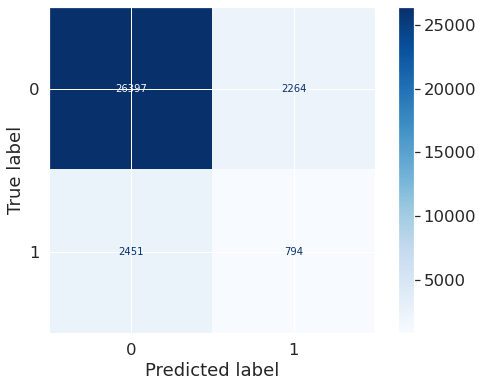

In [41]:
sns.set(font_scale=1.5) 

fig, ax = plt.subplots(figsize=(8,6)) 
plot_confusion_matrix(best_model_knn, X_tf_idf_validation, Y_validation, cmap=plt.cm.Blues, ax=ax);

In [42]:
results.loc[0,'grid_search_time'] = 112
results.loc[0,'best_score_F1'] = 0.39
results.loc[0,'accuracy'] = 0.85
results.loc[0,'F1_score'] = 0.25
results.loc[0,'auc_roc'] = 0.65

### Logistic Regression Classifier

- **обучение**

In [43]:
lr_hyperparameters_search_space = dict()
lr_hyperparameters_search_space['C'] = [0.1, 25, 50]
lr_hyperparameters_search_space['tol'] = [1e-2, 1e-1] 
lr_hyperparameters_search_space['class_weight'] = ['balanced'] 
lr_hyperparameters_search_space['solver'] = ['newton-cg', 'liblinear'] 
lr_hyperparameters_search_space['random_state'] = [ML_RND_GNR_SEED_VALUE_CONST]

In [44]:
start = time.time()
print('Старт поиска лучших параметров для LR classifier...')

model_lr = LogisticRegression()
gs_lr = GridSearchCV(model_lr, 
                     lr_hyperparameters_search_space, 
                     scoring='f1',
                     cv=ML_CROSS_VALIDATION_FOLDS_NUMBER_CONST)

gs_result = gs_lr.fit(X_tf_idf_training, Y_training)
print('Оптимальные параметры для LR classifier найдены ...')       

_time = time.time() - start

Старт поиска лучших параметров для LR classifier...
Оптимальные параметры для LR classifier найдены ...


In [45]:
get_gs_results(_time, gs_result.best_score_, gs_result.best_params_)

Время подбора                 10.0 сек.
Лучший результат:             0.81
Лучшая модель с параметрами:  {'C': 25, 'class_weight': 'balanced', 'random_state': 424, 'solver': 'newton-cg', 'tol': 0.1}


- **проверка качества модели на валидационной выборке**

In [46]:
best_model_lr =  LogisticRegression(C=25,
                                    tol=0.1,
                                    solver='newton-cg',
                                    class_weight='balanced',
                                    random_state=ML_RND_GNR_SEED_VALUE_CONST)
    
best_model_lr.fit(X_tf_idf_training, Y_training)

LogisticRegression(C=25, class_weight='balanced', random_state=424,
                   solver='newton-cg', tol=0.1)

In [47]:
get_info_results(best_model_lr, X_tf_idf_validation, Y_validation)

accuracy:  0.93
f1_score:  0.72
auc_roc:   0.96

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     28661
           1       0.63      0.85      0.72      3245

    accuracy                           0.93     31906
   macro avg       0.81      0.90      0.84     31906
weighted avg       0.95      0.93      0.94     31906



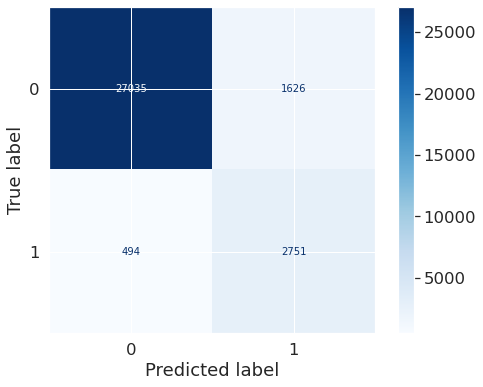

In [48]:
fig, ax = plt.subplots(figsize=(8,6)) 
plot_confusion_matrix(best_model_lr, X_tf_idf_validation, Y_validation, cmap=plt.cm.Blues, ax=ax);

In [49]:
results.loc[1,'grid_search_time'] = 10
results.loc[1,'best_score_F1'] = 0.81
results.loc[1,'accuracy'] = 0.93
results.loc[1,'F1_score'] = 0.72
results.loc[1,'auc_roc'] = 0.96

### CatBoost Classifier

- **обучение**

In [50]:
cbr_hyperparameters_search_space = dict()
cbr_hyperparameters_search_space['depth'] = [3, 7]
cbr_hyperparameters_search_space['iterations'] = [3500]
cbr_hyperparameters_search_space['learning_rate'] = [0.05]
cbr_hyperparameters_search_space['eval_metric'] = ['F1']
cbr_hyperparameters_search_space['random_state'] = [ML_RND_GNR_SEED_VALUE_CONST]

In [52]:
start = time.time()
print('Старт поиска лучших параметров для CatBoost classifier...')

model_cbr =  CatBoostClassifier(verbose=2500)
gs_cbr = GridSearchCV(model_cbr, 
                      cbr_hyperparameters_search_space, 
                      n_jobs=-1, 
                      scoring='f1',
                      cv=ML_CROSS_VALIDATION_FOLDS_NUMBER_CONST)

gs_result = gs_cbr.fit(X_tf_idf_training, Y_training)
print('Оптимальные параметры для CatBoost classifier найдены ...')      

_time = time.time() - start

Старт поиска лучших параметров для CatBoost classifier...
0:	learn: 0.3529213	total: 95.6ms	remaining: 5m 34s
2500:	learn: 0.8710778	total: 6m 14s	remaining: 2m 29s
3499:	learn: 0.8882162	total: 8m 43s	remaining: 0us
0:	learn: 0.4293261	total: 156ms	remaining: 9m 4s
2500:	learn: 0.8738350	total: 6m 17s	remaining: 2m 30s
3499:	learn: 0.8897364	total: 8m 45s	remaining: 0us
0:	learn: 0.5250149	total: 666ms	remaining: 38m 50s
2500:	learn: 0.9420415	total: 17m 41s	remaining: 7m 4s
3499:	learn: 0.9917201	total: 23m 19s	remaining: 0us
0:	learn: 0.4357977	total: 701ms	remaining: 40m 54s
2500:	learn: 0.9365991	total: 17m 43s	remaining: 7m 4s
3499:	learn: 0.9918194	total: 23m 19s	remaining: 0us
0:	learn: 0.5234909	total: 368ms	remaining: 21m 27s
2500:	learn: 0.9098698	total: 12m 13s	remaining: 4m 53s
3499:	learn: 0.9304946	total: 17m 5s	remaining: 0us
Оптимальные параметры для CatBoost classifier найдены ...


In [53]:
get_gs_results(_time, gs_result.best_score_, gs_result.best_params_)

Время подбора                 2431.0 сек.
Лучший результат:             0.82
Лучшая модель с параметрами:  {'depth': 7, 'eval_metric': 'F1', 'iterations': 3500, 'learning_rate': 0.05, 'random_state': 424}


- **проверка качества модели на валидационной выборке**

In [54]:
best_model_cbr = CatBoostClassifier(verbose=500,
                                    iterations=3500,
                                    depth=7,
                                    learning_rate=0.05,
                                    eval_metric='F1',
                                    random_state=ML_RND_GNR_SEED_VALUE_CONST)
best_model_cbr.fit(X_tf_idf_training, Y_training)

0:	learn: 0.5234909	total: 301ms	remaining: 17m 34s
500:	learn: 0.8211306	total: 2m 29s	remaining: 14m 51s
1000:	learn: 0.8626089	total: 4m 56s	remaining: 12m 19s
1500:	learn: 0.8830252	total: 7m 22s	remaining: 9m 49s
2000:	learn: 0.8963641	total: 9m 48s	remaining: 7m 21s
2500:	learn: 0.9098698	total: 12m 14s	remaining: 4m 53s
3000:	learn: 0.9202247	total: 14m 40s	remaining: 2m 26s
3499:	learn: 0.9304946	total: 17m 6s	remaining: 0us


In [55]:
get_info_results(best_model_cbr, X_tf_idf_validation, Y_validation)

accuracy:  0.96
f1_score:  0.79
auc_roc:   0.97

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     28661
           1       0.81      0.78      0.79      3245

    accuracy                           0.96     31906
   macro avg       0.89      0.88      0.89     31906
weighted avg       0.96      0.96      0.96     31906



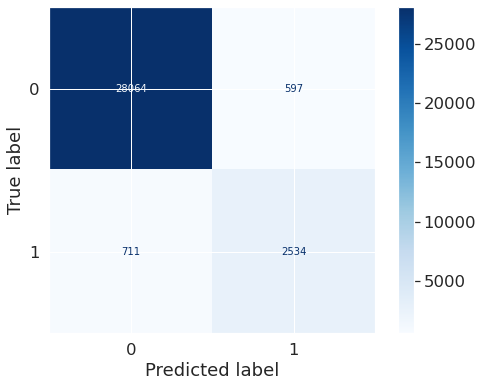

In [56]:
fig, ax = plt.subplots(figsize=(8,6)) 
plot_confusion_matrix(best_model_cbr, X_tf_idf_validation, Y_validation, cmap=plt.cm.Blues, ax=ax);

In [57]:
results.loc[2,'grid_search_time'] = 2431
results.loc[2,'best_score_F1'] = 0.82
results.loc[2,'accuracy'] = 0.96
results.loc[2,'F1_score'] = 0.79
results.loc[2,'auc_roc'] = 0.97

### LGBM Classifier

- **обучение**

In [58]:
lgb_hyperparameters_search_space = dict()
lgb_hyperparameters_search_space['boosting_type'] = ['dart', 'gbdt', 'goss']
lgb_hyperparameters_search_space['max_depth'] = [2, 4, 6, 8, 10, 12]
lgb_hyperparameters_search_space['num_leaves'] = [10, 50, 100]

In [59]:
start = time.time()
print('Старт поиска лучших параметров для LGBM classifier...')

lgb_model = LGBMClassifier(verbosity=-1) 
gs_lgb = GridSearchCV(lgb_model, 
                      lgb_hyperparameters_search_space, 
                      n_jobs=-1, 
                      scoring='f1',
                      cv=ML_CROSS_VALIDATION_FOLDS_NUMBER_CONST)

gs_result = gs_lgb.fit(X_tf_idf_training, Y_training)
print('Оптимальные параметры для LGBM classifier найдены ...')   

_time = time.time() - start

Старт поиска лучших параметров для LGBM classifier...
Оптимальные параметры для LGBM classifier найдены ...


In [60]:
get_gs_results(_time, gs_result.best_score_, gs_result.best_params_)

Время подбора                 113.0 сек.
Лучший результат:             0.76
Лучшая модель с параметрами:  {'boosting_type': 'gbdt', 'max_depth': 12, 'num_leaves': 50}


- **проверка качества модели на валидационной выборке**

In [61]:
best_model_lgb = LGBMClassifier(n_jobs=-1,
                                boosting_type = 'gbdt',
                                max_depth = 12,
                                num_leaves = 50)
                         
best_model_lgb.fit(X_tf_idf_training, Y_training)  

LGBMClassifier(max_depth=12, num_leaves=50)

In [62]:
get_info_results(best_model_lgb, X_tf_idf_validation, Y_validation)

accuracy:  0.96
f1_score:  0.76
auc_roc:   0.96

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28661
           1       0.86      0.67      0.76      3245

    accuracy                           0.96     31906
   macro avg       0.91      0.83      0.87     31906
weighted avg       0.95      0.96      0.95     31906



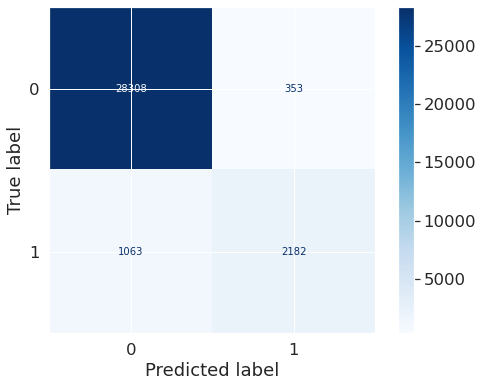

In [63]:
fig, ax = plt.subplots(figsize=(8,6)) 
plot_confusion_matrix(best_model_lgb, X_tf_idf_validation, Y_validation, cmap=plt.cm.Blues, ax=ax);

In [65]:
results.loc[3,'grid_search_time'] = 113
results.loc[3,'best_score_F1'] = 0.76
results.loc[3,'accuracy'] = 0.96
results.loc[3,'F1_score'] = 0.76
results.loc[3,'auc_roc'] = 0.96

### Выводы

Посмотрим на итоговые метрики и выберем лучшую модель.

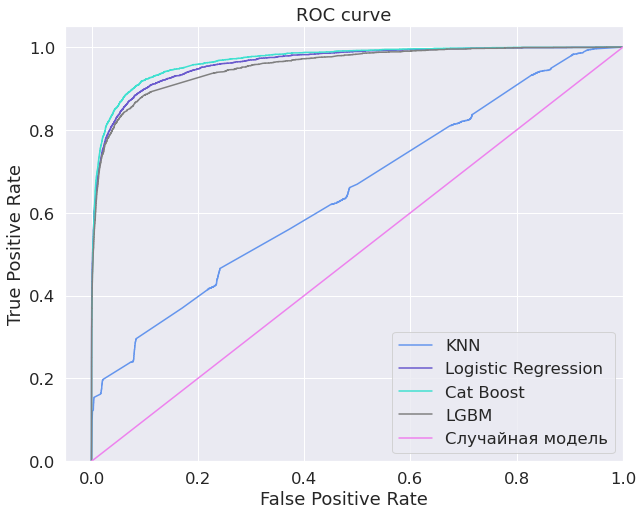

In [64]:
_actual_predict_proba_knn =best_model_knn.predict_proba(X_tf_idf_validation)
_actual_predict_proba_values_knn =_actual_predict_proba_knn[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_validation, _actual_predict_proba_values_knn, pos_label=1)

_actual_predict_proba_lr =best_model_lr.predict_proba(X_tf_idf_validation)
_actual_predict_proba_values_lr =_actual_predict_proba_lr[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_validation, _actual_predict_proba_values_lr, pos_label=1) 

_actual_predict_proba_cbr =best_model_cbr.predict_proba(X_tf_idf_validation)
_actual_predict_proba_values_cbr =_actual_predict_proba_cbr[:,1]
fpr_cbr, tpr_cbr, thresholds_cbr = roc_curve(Y_validation, _actual_predict_proba_values_cbr, pos_label=1) 

_actual_predict_proba_lgb =best_model_lgb.predict_proba(X_tf_idf_validation)
_actual_predict_proba_values_lgb =_actual_predict_proba_lgb[:,1]
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(Y_validation, _actual_predict_proba_values_lgb, pos_label=1) 


fig, ax = plt.subplots(figsize=(10,8))   
plt.plot(fpr_knn, tpr_knn, color='cornflowerblue') 
plt.plot(fpr_lr, tpr_lr, color='slateblue') 
plt.plot(fpr_cbr, tpr_cbr, color='turquoise') 
plt.plot(fpr_lgb, tpr_lgb, color='gray')
plt.plot([0, 1], [0, 1], color='violet') 
plt.xlim([-0.05, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.legend(('KNN','Logistic Regression','Cat Boost', 'LGBM','Случайная модель'),
           loc= 'lower right') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC curve');

In [67]:
results.sort_values(by='best_score_F1')

,model_name,grid_search_time,best_score_F1,accuracy,F1_score,auc_roc
0,KNN_Classifier,215.0,0.38,0.84,0.29,0.66
3,LGBM_Classifier,113.0,0.76,0.96,0.76,0.96
1,Logistic_Regression,10.0,0.81,0.93,0.72,0.96
2,CatBoost_Classifier,2431.0,0.82,0.96,0.79,0.97


Из наших четырех моделей три **CatBoost_Classifier, Logistic_Regression, LGBM_Classifier**  удовлетворяют условиям проекта - метрика **best_score_F1** не меньше **0.75**.<br>
Модель **CatBoost_Classifier** имеет самый высокий показатель best_score_F1 = **0.82**<br>
По метрике **auc_roc** лидируют модели **CatBoost_Classifier, Logistic_Regression**, что наглядно видно на графике **ROC curve** выше.<br>

Матрица ошибок **plot_confusion_matrix** показывает, что у **Logistic_Regression**:
- самое большое количество верно предсказанных токсичных комментариев 2751,
- самое низкое количество ложноотрицательных предсказаний 494,
- но при этом есть большое количество ложноположительных предсказаний 1626 (модель предсказала токсичный комментарий, а он таковым не являлся).

Матрица ошибок **plot_confusion_matrix** у **CatBoost_Classifier** выглядит немного иначе:
- так же большое количество верно предсказанных токсичных комментариев 2534 (2ое место после Logistic_Regression),
- достаточно низкое количество ложноотрицательных предсказаний 711 (2ое место после Logistic_Regression),
- но при этом есть большое количество ложноположительных предсказаний 597 (2ое место после LGBM_Classifier).

То есть Logistic_Regression пропустит 494 негативных комментариев и 1626 лишних отметит токсичными и отправит на модерацию.
CatBoost_Classifier пропустит 711 негативных комментариев и 597 лишних отметит токсичными и отправит на модерацию.
CatBoost_Classifier, на мой взгляд, некая золотая середина среди всех наших моделей.

Так же следует отметить, что у **Logistic_Regression** очень быстрое время подбора оптимальных гиперпараметров и скорость обучения.<br>
У **CatBoost_Classifier** метрики лучше, чем у **Logistic_Regression**, но очень большое время обучения.

Если скорость обучения нам не приоритетна, то выберем в качестве лучшей модели **CatBoost_Classifier**<br>
Далее проверим ее качество на тестовой выборке и сравним метрики с константной моделью.

## Дополнительная проверка модели

Для проверки моделей на адекватность возьмем фиктивный классификатор DummyClassifier.<br>
Для наших целей используем две стратегии:
- **Сonstant** - константа: всегда предсказывает одно и то же число - выберем всегда = 1 - любой комментарый - токсичный.
- **Most_frequent** - cамый частый: классификатор всегда предсказывает наиболее частую метку класса в обучающих данных - у нас это будет 0 - нетоксичный комментарий.

In [70]:
model_dummy_classifier_c = DummyClassifier(strategy="constant", 
                                           random_state=ML_RND_GNR_SEED_VALUE_CONST,
                                           constant=1)

model_dummy_classifier_c.fit(X_tf_idf_training, Y_training)
print("Strategy -- 'constant = 1': {}".format(model_dummy_classifier_c.score(X_tf_idf_validation, Y_validation)))

Strategy -- 'constant = 1': 0.10170500846235818


accuracy:  0.1
f1_score:  0.18
auc_roc:   0.5

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     28661
           1       0.10      1.00      0.18      3245

    accuracy                           0.10     31906
   macro avg       0.05      0.50      0.09     31906
weighted avg       0.01      0.10      0.02     31906



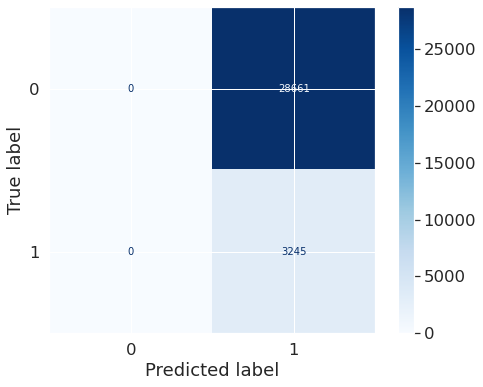

In [71]:
get_info_results(model_dummy_classifier_c, X_tf_idf_validation, Y_validation)

fig, ax = plt.subplots(figsize=(8,6)) 
plot_confusion_matrix(model_dummy_classifier_c, X_tf_idf_validation, Y_validation, cmap=plt.cm.Blues, ax=ax);

In [74]:
model_dummy_classifier_f = DummyClassifier(strategy="most_frequent", 
                                         random_state=ML_RND_GNR_SEED_VALUE_CONST)

model_dummy_classifier_f.fit(X_tf_idf_training, Y_training)
print("Strategy -- 'most_requent': {}".format(model_dummy_classifier_f.score(X_tf_idf_validation, Y_validation)))

Strategy -- 'most_requent': 0.8982949915376418


accuracy:  0.9
f1_score:  0.0
auc_roc:   0.5

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     28661
           1       0.00      0.00      0.00      3245

    accuracy                           0.90     31906
   macro avg       0.45      0.50      0.47     31906
weighted avg       0.81      0.90      0.85     31906



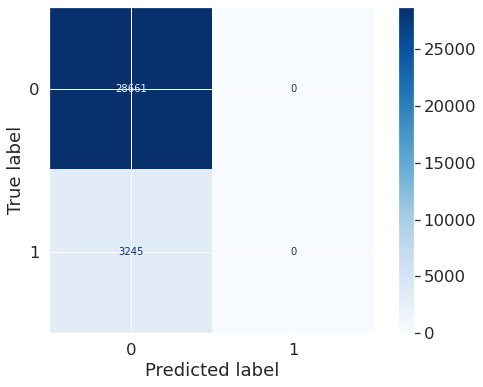

In [75]:
get_info_results(model_dummy_classifier_f, X_tf_idf_validation, Y_validation)

fig, ax = plt.subplots(figsize=(8,6)) 
plot_confusion_matrix(model_dummy_classifier_f, X_tf_idf_validation, Y_validation, cmap=plt.cm.Blues, ax=ax);

## Тестирование лучшей модели **CatBoost Classifier**

accuracy:  0.96
f1_score:  0.79
auc_roc:   0.97

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     28662
           1       0.81      0.77      0.79      3245

    accuracy                           0.96     31907
   macro avg       0.89      0.87      0.88     31907
weighted avg       0.96      0.96      0.96     31907



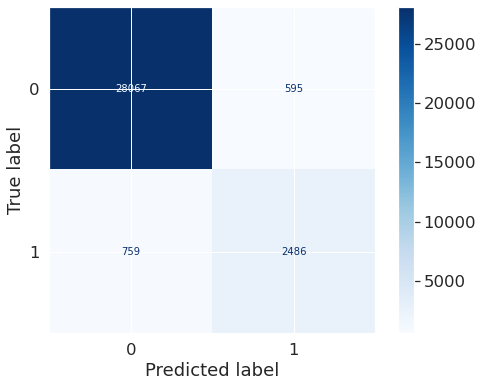

In [76]:
get_info_results(best_model_cbr, X_tf_idf_testing, Y_testing)

fig, ax = plt.subplots(figsize=(8,6)) 
plot_confusion_matrix(best_model_cbr, X_tf_idf_testing, Y_testing, cmap=plt.cm.Blues, ax=ax);

## Выводы

В задачи нашего проекта входило создание и обучение модели для классификации комментариев на позитивные и негативные. <br>
При этом модель должна быть со значением метрики качества F1 не меньше 0.75.<br>

**1. Мы загрузили и подготовили данные**
- в исходных данных содержалось 2 столбца text и toxic, почти 160 тысяч строк без дубликатов
- выполнили преобразование текста: убрали пунктуацию, привели текст к нижнему регистру, убрали стоп-слова, сделали лемматизацию
- разделили датасет на выборки
- убрали присутствующий изначально дисбаланс классов
- определили важность слов для комментариев TF-IDF (преобразовали текст в векторное представление)

**2. Создали 4 модели, подобрали для них оптимальные гиперпараметры и получили необходмые метрики**

**KNN Classifier**
- Время подбора оптимальных гиперпараметров **215** сек.
- F1 best_score:  **0.38**
- auc_roc:  **0.66**

**Logistic Regression Classifier**
- Время подбора оптимальных гиперпараметров **10** сек.
- F1 best_score:  **0.81**
- auc_roc:  **0.96**

**CatBoost Classifier**
- Время подбора оптимальных гиперпараметров **2431** сек.
- F1 best_score:  **0.82** 
- auc_roc:  **0.97**
 
**LGBM Classifier**
- Время подбора оптимальных гиперпараметров **113** сек.
- F1 best_score:  **0.76**
- auc_roc:  **0.96**

**Dummy Classifier**<br>
- constant = 1 
    - F1:  **0.18**
    - auc_roc:  **0.50**
- most_frequent = 0
    - F1:  **0.00**
    - auc_roc:  **0.50**

**3. Выбрали лучшую модель и протестировали ее.**


Из наших четырех моделей три **CatBoost_Classifier, Logistic_Regression, LGBM_Classifier** удовлетворяют условиям проекта - метрика F1 не меньше 0.75.<br>

Сравнение метрик с константной моделью DummyClassifier говорит о том, что все три подходящие под условия проекта модели - адекватны и их предсказания точнее, чем постоянное предсказывание наиболее частого класса - позитивные комментарии, или постоянное предсказывание всегда токсичных комментариев.<br>

Модель **CatBoost_Classifier** имеет самый высокий показатель **best_score_F1 = 0.82** и самую высокую метрику **auc_roc = 0.97** <br>
Данную модель можно рекомендовать магазину «Викишоп» для классификации комментариев на позитивные и негативные.

На тестовой выборке модель **CatBoost_Classifier** показала следующие значения метрик **F1 = 0.79**, **auc_roc = 0.97**.<br>